In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from regression2_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

In [5]:
np.set_printoptions(formatter={'float': lambda x: format(x, '6.3f')}) # настройка вывода для матриц

In [6]:
#загрузим данные
X_room, X_lstat, y = load_small_data() 

In [8]:
y = y.reshape(-1, 1)

In [11]:
def create_data(X1, X2):
    X_ones = np.ones_like(X1)
    return np.column_stack([X_ones, X1, X2])

X = create_data(X_room, X_lstat)
print(X)

[[ 1.000  6.575  4.980]
 [ 1.000  6.421  9.140]
 [ 1.000  7.185  4.030]
 ...
 [ 1.000  6.976  5.640]
 [ 1.000  6.794  6.480]
 [ 1.000  6.030  7.880]]


In [12]:
Theta = np.random.random_sample(size=(3, 1))
print(Theta)

[[ 0.150]
 [ 0.728]
 [ 0.385]]


In [13]:
def linear_function(X, Theta):
    return np.dot(X, Theta) #X @ Theta

y_pred = linear_function(X, Theta)

# Градиентный спуск линейной функции от двух параметров

У нас есть линейная функция от двух параметров. 

Воспользуемся такой же идей как для линейной регрессии от одного параметра.

## Функция ошибки

Определим функцию ошибки от параметров $\Theta$ :

\begin{equation*}
Loss(\Theta) = \dfrac{1}{N}\sum_{i=1}^{N}{(\tilde{y}_i - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{(X_i\Theta - y_i)^2}
\end{equation*}

Где $N$ - это количество квартир, $y_i$ - реальная цена квартиры, $\tilde{y}_i$ - предсказанная цена для $i$-oй квартиры.   

## Реализация функции ошибки

In [22]:
def MSE_Loss(X, Theta, y_true):
    y_pred = linear_function(X, Theta)
    return np.mean((y_pred - y_true)**2)

print(MSE_Loss(X, Theta, y))

288.58497880233915


Необходимо минимизировать данную ошибку, подобрав параметры $\Theta$.  

Для нахождения параметров $\Theta$, также используем градиентный спуск.

## Градиент функции ошибки

Так как функция ошибки содержит 3 параметра $\theta_0, \theta_1, \theta_2$, для получения градиента необходимо взять частную производную по каждому параметру.

\begin{equation*}
\dfrac{\partial Loss(\Theta)}{\partial \theta_j} = \dfrac{\partial}{\partial \theta_j}(\dfrac{1}{N} \sum_{i=1}^{N}{(X_i\Theta - y_i)^2})
\end{equation*}

\begin{equation*}
\dfrac{\partial Loss(\Theta)}{\partial \theta_j} = \dfrac{2}{N} \sum_{i=1}^{N}(X_i\Theta - y_i)\dfrac{\partial (X_i\Theta  - y_i)}{\partial \theta_j}
\end{equation*}

\begin{equation*}
\dfrac{\partial Loss(\Theta)}{\partial \theta_j} = \dfrac{2}{N} \sum_{i=1}^{N}(X_i\Theta - y_i)\dfrac{\partial (\theta_0x_{i, 0} + \theta_1 x_{i,1} + \theta_2 x_{i,2}  - y_i)}{\partial \theta_j}
\end{equation*}

\begin{equation*}
\dfrac{\partial Loss(\Theta)}{\partial \theta_j} = \dfrac{2}{N} \sum_{i=1}^{N}(X_i\Theta - y_i) x_{ij}
\end{equation*}

$j = 0,1,2$.  

$x_{i,0} = 1$.  

Взяв частную производную по каждому параметру  $\theta_j$, получим градиент функции ошибки:

\begin{equation*}
\nabla Loss(\Theta) =
   \begin{bmatrix}
   \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,0}\\
   \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,1}\\
   \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,2}\\
   \end{bmatrix}
\end{equation*}

## Реализация подсчета градиента

In [23]:
def gradient_function(Theta, X, y_true):
    grad = np.zeros_like(Theta)
    y_pred = linear_function(X, Theta)
    for j in range(Theta.shape[0]):       
        grad[j] = 2*np.mean((y_pred - y_true)* X[:,j])
    return grad

gard = gradient_function(Theta, X, y)
print(gard)

[[-25.877]
 [-162.629]
 [-327.425]]


## Градиентный спуск

Для нашего примера с 3 коэффициентами, алгоритм градиентного спуска будет выглядеть следующим образом:  

$\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial Loss(\Theta)}{\partial \theta_j}$  

$\theta_{j_{new}} = \theta_j - \alpha  \dfrac{2}{N} \sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,j}$

$j = 0,1,2$.  

Тогда обновление вектора $\Theta$ будет выглядеть следующим образом:
 
\begin{equation*}
   \theta_{0_{new}} = \theta_0 - \alpha  \dfrac{2}{N}\sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,0}\\
   \theta_{1_{new}} = \theta_1 - \alpha  \dfrac{2}{N}\sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,1}\\
   \theta_{2_{new}} = \theta_2 - \alpha  \dfrac{2}{N}\sum_{i=1}^{N} (X_i\Theta - y_i)x_{i,2}
\end{equation*}

Выполняем данную процедуру в цикле заданное число раз.

Но это выражение можно упростить, если воспользоваться матричными вычислениями.

$\Theta$ - это вектор размера (3, 1). И градиент функции ошибки $\nabla Loss(\Theta)$ также вектор размером (3, 1).

$$\Theta_{new} = \Theta - \alpha \nabla Loss(\Theta)$$ 

Алгоритм градиентного спуска с 3-мя коэффициентами можно описать следующим образом.

* Выбираем случайное значение для $\Theta = (\theta_0, \theta_1, \theta_2)^T $
* Повторить $iter$ раз:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\Theta_{new} = \Theta - \alpha \nabla Loss(\Theta)$

Где $\alpha$ это коэффициент, который мы выбираем.

## Реализация градиентного спуска

In [24]:
def gradient_descent(Theta, X, y, alpha, iters):        
    theta = Theta
    for i in range (iters):
        theta = theta - alpha * gradient_function(theta, X, y)

    return theta

In [25]:
theta_opt = gradient_descent(Theta, X, y, 0.0001, 10000)
MSE_Loss(X, theta_opt, y)

256.05766706140446

## Визуализация результата

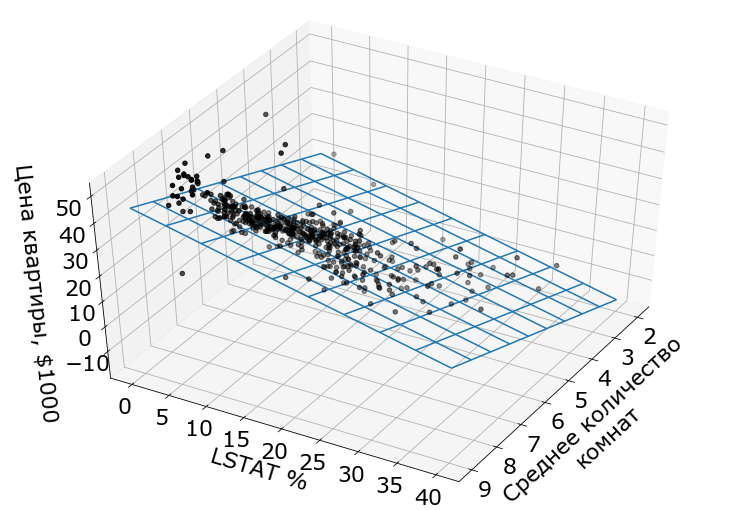

In [12]:
plot_predicted_plane(X, y, theta_opt, angle1=45, angle2=30)

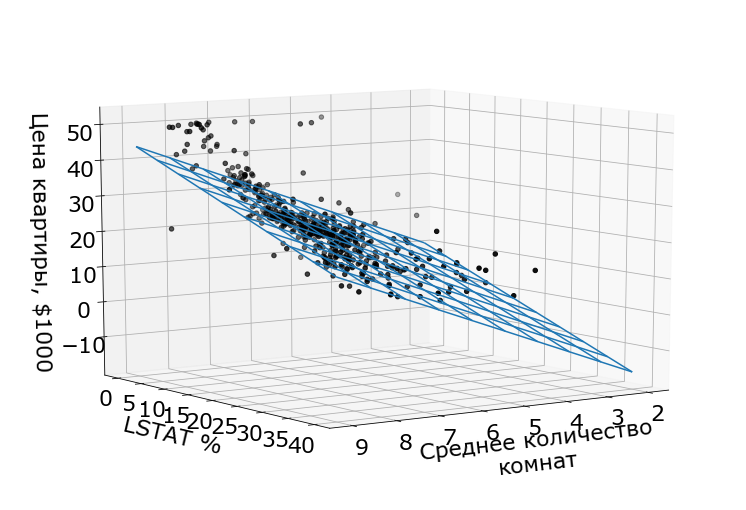

In [13]:
plot_predicted_plane(X, y, theta_opt, angle1=10, angle2=55)